In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]
wine_df = pd.read_csv(url, header=None, names=columns)

X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_lasso_features = lasso_coefficients[lasso_coefficients != 0].index
print("Selected Features by Lasso:")
print(selected_lasso_features)

X_train_lasso = X_train_scaled[:, lasso_coefficients != 0]
X_test_lasso = X_test_scaled[:, lasso_coefficients != 0]

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_lasso, y_train)
y_pred_rf = rf_classifier.predict(X_test_lasso)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Accuracy with Selected Features: {rf_accuracy:.4f}\n")

Selected Features by Lasso:
Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Total_phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Color_intensity', 'Hue',
       'OD280/OD315', 'Proline'],
      dtype='object')

Random Forest Model Accuracy with Selected Features: 1.0000



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]
wine_df = pd.read_csv(url, header=None, names=columns)

X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet.fit(X_train_scaled, y_train)
elasticnet_coefficients = pd.Series(elasticnet.coef_, index=X.columns)
selected_elasticnet_features = elasticnet_coefficients[elasticnet_coefficients != 0].index
print("Selected Features by ElasticNet:")
print(selected_elasticnet_features)

X_train_elasticnet = X_train_scaled[:, elasticnet_coefficients != 0]
X_test_elasticnet = X_test_scaled[:, elasticnet_coefficients != 0]

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_elasticnet, y_train)
y_pred_rf = rf_classifier.predict(X_test_elasticnet)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Accuracy with Selected Features: {rf_accuracy:.4f}\n")

Selected Features by ElasticNet:
Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Total_phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

Random Forest Model Accuracy with Selected Features: 1.0000



Random Forest Model Accuracy: 1.0000


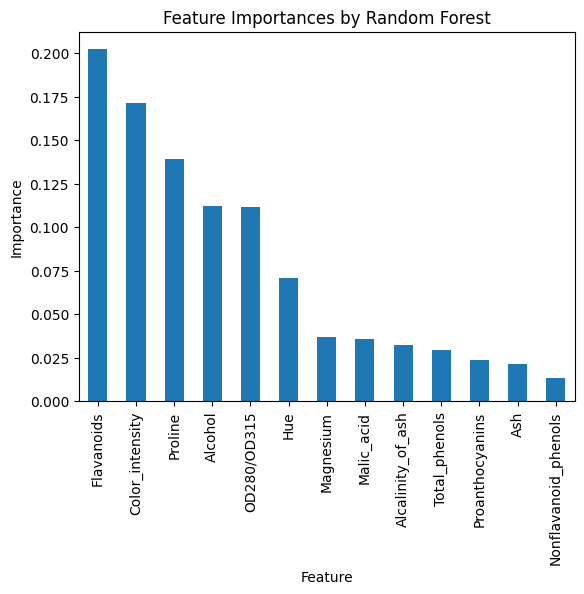

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]
wine_df = pd.read_csv(url, header=None, names=columns)

X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances by Random Forest')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()